## 타이타닉 데이터를 활용한 데이터 분석

## 0. 라이브러리 및 데이터
## Library & Data

In [35]:
import pandas as pd #판다스 패키지 불러오기

### pd.read_csv()
 - csv파일 읽는 함수

In [36]:
# 데이터 불러오기
# 모델 학습 파일
# 모델 시험지 파일
# 답안지 파일 

In [37]:
train = pd.read_csv('./타이타닉./train.csv')
test = pd.read_csv('./타이타닉./test.csv')
submission = pd.read_csv('./타이타닉./submission.csv')

---

## 1. Data Spread (기술통계영역)

### 1) 데이터 확인

- PassengerId : 탑승객의 고유 아이디
- Survival : 생존여부(0: 사망, 1: 생존)
- Pclass : 등실의 등급(1: 1등급, 2: 2등급, 3: 3등급)
- Name : 이름
- Sex : 성별
- Age : 나이
- Sibsp : 함께 탑승한 형제자매, 아내 남편의 수
- Parch: 함께 탑승한 부모, 자식의 수
- Ticket: 티켓번호
- Fare: 티켓의 요금
- Cabin: 객실번호
- Embarked: 배에 탑승한 위치(C = Cherbourg, Q = Queenstown, S = Southampton)

### a. 많은 데이터 중 맨 위 몇개, 맨 마지막 몇개 즉 몇개만 확인해보기
pd.DataFrame.head()
 - 데이터 프레임의 위에서 부터 n개 행을 보여주는 함수
 - n의 기본 값(default 값)은 5

In [38]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


pd.DataFrame.tail()
 - 데이터 프레임의 아래에서 부터 n개 행을 보여주는 함수
 - n의 기본 값(default 값)은 5

In [39]:
train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


### b. 데이터프레임의 행,열 개수 확인
pd.DataFrame.shape
 - 데이터 프레임의 행의 개수와 열의 개수가 저장되어 있는 속성(attribute)

In [40]:
train.shape

(891, 12)

### c. 데이터프레임의 column별 정보를 확인
pd.DataFrame.info()
- 데이터셋의 column별 정보를 알려주는 함수
- 비어 있지 않은 값은 (non-null)은 몇개인지?
- column의 type은 무엇인지?
 - type의 종류 : int(정수), float(실수), object(문자열), 등등 (date, ...)

In [41]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### 2. 숫자형 (int, float) column들의 기술 통계량 확인
pd.DataFrame.describe()
- 숫자형 (int, float) column들의 기술 통계량을 보여주는 함수

- 기술통계량이란?
 - 해당 column을 대표할 수 있는 통계값들을 의미
 
 
- 기술통계량 종류
 - count: 해당 column에서 비어 있지 않은 값의 개수
 - mean: 평균
 - std: 표준편차
 - min: 최솟값 (이상치 포함)
 - 25% (Q1): 전체 데이터를 순서대로 정렬했을 때, 아래에서 부터 1/4번째 지점에 있는 값
 - 50% (Q2): 중앙값 (전체 데이터를 순서대로 정렬했을 때, 아래에서 부터 2/4번째 지점에 있는 값)
 - 75% (Q3): 전체 데이터를 순서대로 정렬했을 때, 아래에서 부터 3/4번째 지점에 있는 값
 - max: 최댓값 (이상치 포함) 
 
 
 
- 이상치: 울타리 밖에 있는 부분을 이상치라고 정의함
   - 아래쪽 울타리: $Q_1$ - $1.5 * IQR$
   - 위쪽 울타리: $Q_3$ + $1.5 * IQR$
   - $IQR$ = $Q_3 - Q_1$
 
 
<img src="https://miro.medium.com/max/10125/1*NRlqiZGQdsIyAu0KzP7LaQ.png" width="700" height="700">

In [42]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### 3. 그럼 숫자형이 아닌 column들은 무얼 확인합니까
1) pd.Series.value_counts()
 - series 내 고유값들 각각의 개수를 보여주는 함수
 - 가장 많이 나오는 고유값들 순서로 보여줍니다.
 - 비어 있는 값은 고려하지 않습니다.

In [43]:
val_Pclass = train.value_counts('Pclass')
val_Pclass

Pclass
3    491
1    216
2    184
dtype: int64

In [44]:
val_Sex = train.value_counts('Sex')
val_Sex

Sex
male      577
female    314
dtype: int64

In [45]:
val_Survived = train.value_counts('Survived')
val_Survived

Survived
0    549
1    342
dtype: int64

In [46]:
val_Embarked = train.value_counts('Embarked')
val_Embarked

Embarked
S    644
C    168
Q     77
dtype: int64

2. pd.Series.unique()
- 해당 series의 고유값들만 보여주는 함수
- [1, 1, 1, 3] 이라는 시리즈가 있다면, unique() 함수 적용시 [1, 3]이 출력됩니다.
- nan 값이 있을시 nan값도 포함하여 출력한다 (Not a Number)
- 출현하는 순서대로 나오기 때문에, 알파벳 순서 또는 오름차순으로 정렬되어 있지 않습니다.

In [47]:
train['Age'].unique()

array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

3. pd.DataFrame.groupby()
 - 집단에 대한 통계량 확인 
 
<img src="https://s3.amazonaws.com/files.dezyre.com/images/Tutorials/Split+Apply+Combine+Strategy.png" width="700" height="500">

In [48]:
Pclass_Age = train.groupby(['Pclass']).mean()['Age']
Pclass_Age

C:\Users\USER\AppData\Local\Temp\ipykernel_39104\2738205059.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Pclass_Age = train.groupby(['Pclass']).mean()['Age']


Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64

In [49]:
Embarked_Survived = train.groupby(['Embarked']).sum()['Survived']
Embarked_Survived

C:\Users\USER\AppData\Local\Temp\ipykernel_39104\1007049144.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Embarked_Survived = train.groupby(['Embarked']).sum()['Survived']


Embarked
C     93
Q     30
S    217
Name: Survived, dtype: int64

### 4. 시각화 해봅시다
1. pd.Series.plot(kind = "bar")
- 막대 그래프
- index 값이 x축, value값이 y축으로 대응 됩니다. 
- value_counts()의 결과물을 보여줄 때 유용합니다. 
- groupby된 결과물을 보여줄 때 유용합니다. 

<AxesSubplot: xlabel='Embarked'>

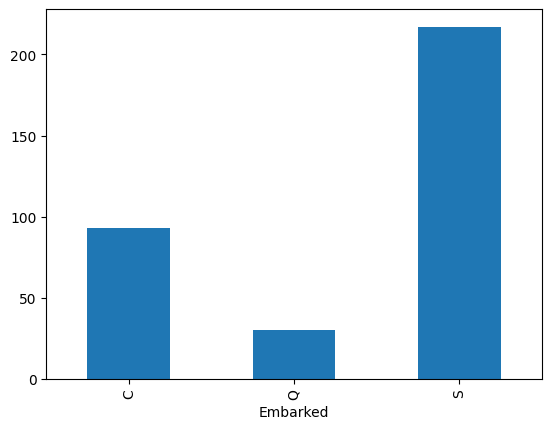

In [50]:
Embarked_Survived.plot(kind = 'bar')

<AxesSubplot: xlabel='Pclass'>

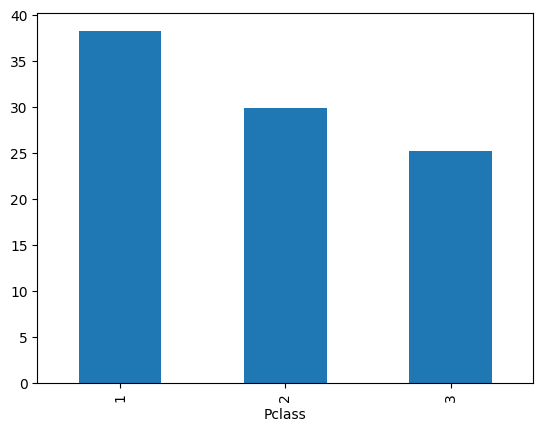

In [51]:
Pclass_Age.plot(kind = 'bar')

2. pd.Series.plot(kind = 'hist')
- 히스토그램: 구간별로 속해있는 row의 개수를 시각화 합니다.
- 수치형에서만 가능, 범주는 안됩니다!
- 보조선은 grid = True를 통해 추가 할 수 있습니다. 

<img src="http://www.statisticslectures.com/images/continuoushistogram.gif" width="700" height="300">

<AxesSubplot: ylabel='Frequency'>

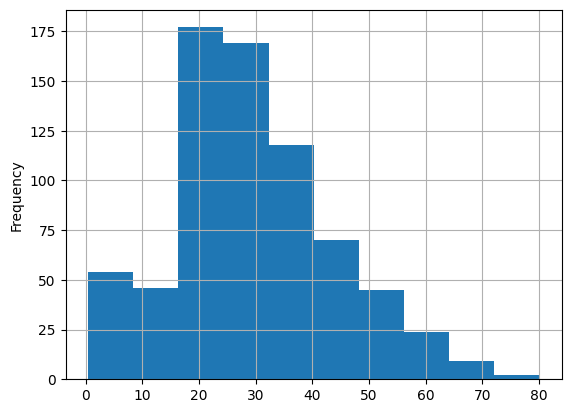

In [52]:
train['Age'].plot(kind = 'hist', grid = True)

3. pd.DataFrame.plot(x, y, kind = 'scatter')
- 산점도: 두 변수간의 관계를 시각화

<AxesSubplot: xlabel='Age', ylabel='Pclass'>

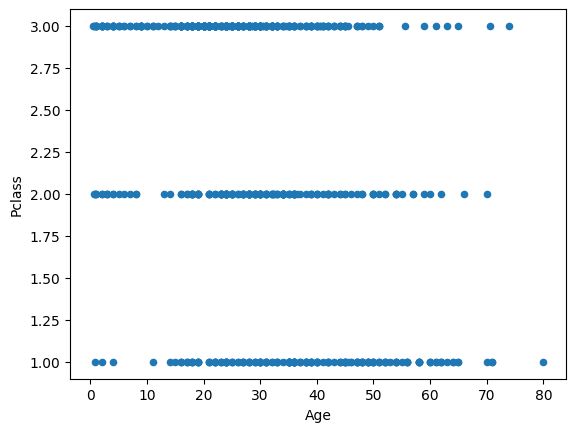

In [53]:
train.plot(x='Age' , y='Pclass', kind = 'scatter')

4. pd.DataFrame.boxplot()
- boxplot : 사분위 지점을 빠르게 파악할 수 있고 이상치가 어느정도인지 빠르게 판단 할 수 있다

<AxesSubplot: >

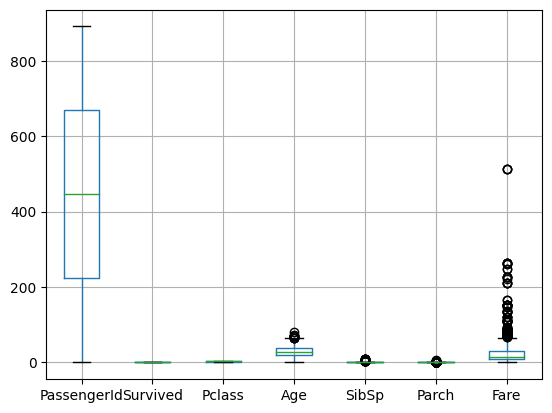

In [54]:
train.boxplot()

C:\Users\USER\AppData\Local\Temp\ipykernel_39104\789344585.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


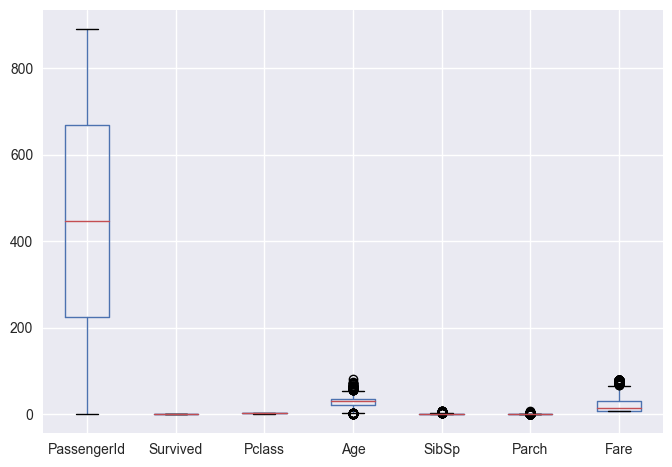

In [73]:
import matplotlib.pyplot as plt
import warnings

%matplotlib inline

plt.style.use('seaborn')


ncols = 7
nrows = 1

fig, axs = plt.subplots(nrows, ncols, constrained_layout = True) #여백조정

# 여기서 어떻게 하드라.....

plt.show()

---

## 2. Data Quality (데이터 품질) 확인 후 데이터 전처리(Data Cleansing & Pre-Processing)

### 1. 결측치 확인 : pd.Series.isna() / pd.DataFrame.isna().sum()
- 결측치 여부를 확인해줍니다.
- 결측치면 True, 아니면 False
- 데이터프레임 컬럼별 결측치값의 개수를 알고싶으면 pd.DataFrame.isna().sum()

In [55]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### 2. 결측치를 채우는 방법 : pd.DataFrame.fillna()
- 결측치를 채우고자 하는 column과 결측치를 대신하여 넣고자 하는 값을 명시해주어야 합니다.
- 범주형 변수일 경우, 최빈값으로 대체할 수 있습니다.
- train data
    - 결측치가 있는 Age는 age의 평균으로 채워봅시다.
    - 결측치가 있는 Embarked는 빈도수가 가장 많은 값으로 채워봅시다.
- test data
    - 결측치가 있는 Age는 age의 평균으로 채워봅시다.

In [56]:
train['Age'].fillna(train['Age'].mean(), inplace =True)


3. 무한대값 확인 : np.isinf(abs(데이터프레임명)).sum()
- 무한대는 -무한대 / 무한대 있으므로 절댓값으로 확인
- 컬럼별 무한대 개수는 isinf().sum()

In [57]:
import numpy as np

np.isinf(abs(train['Fare'])).sum()

0

4. 이상치(outlier)를 확인
5. 이상치 대체방법
- IQR을 이용한 이상치 대체 방법
    - 25%에 위치한 값을 구해줍니다.
    
    `np.quantile(Series, 0.25)`
    
    - 75%에 위치한 값을 구해줍니다.
    
    `np.quantile(Series, 0.75)`
    
    - IQR을 구해줍니다.
    - quantile_25보다 1.5 * IQR 작은 값을 구해줍니다.
    - quantile_75보다 1.5 * IQR 큰 값을 구해줍니다.
    - minimum보다 크거나 같고, maximum보다 작거나 같은 값들만 뽑아냅니다.

In [58]:
print(np.quantile(train['Fare'], 0.25))
print(np.quantile(train['Fare'], 0.75))

Fare_IQR = np.quantile(train['Fare'], 0.75) - np.quantile(train['Fare'], 0.25)
Fare_IQR25 = np.quantile(train['Fare'], 0.25) - Fare_IQR*1.5
Fare_IQR75 = np.quantile(train['Fare'], 0.75) + Fare_IQR*1.5
print(Fare_IQR25, Fare_IQR75)

7.9104
31.0
-26.724 65.6344


- winsorizing을 이용한 이상치 대체 방법
    - from scipy.stats.mstats import winsorize
    - train['변수명']= winsorize(train['변수명'], limits=[퍼센트/2, 퍼센트/2])

In [59]:
from scipy.stats.mstats import winsorize

In [66]:
train['Fare'] = winsorize(train['Fare'], limits=[0.05, 0.1])

<AxesSubplot: >

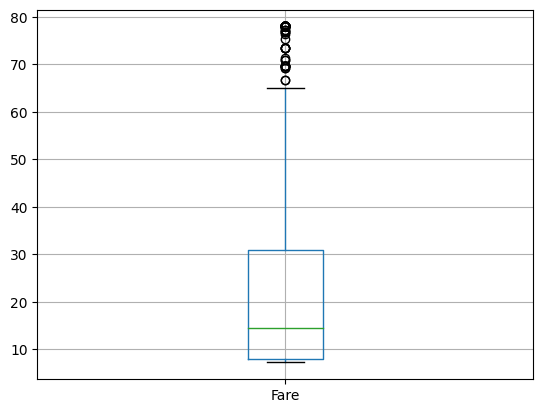

In [67]:
train[['Fare']].boxplot()

In [84]:
train_int = train.loc[:, ['Age', 'SibSp', 'Parch', 'Fare']]
train_int

,Age,SibSp,Parch,Fare
0,22.000000,1,0,7.2500
1,38.000000,1,0,71.2833
2,26.000000,0,0,7.9250
3,35.000000,1,0,53.1000
4,35.000000,0,0,8.0500
...,...,...,...,...
886,27.000000,0,0,13.0000
887,19.000000,0,0,30.0000
888,29.699118,1,2,23.4500
889,26.000000,0,0,30.0000


In [85]:
for i in range(len(train_int.columns)) :
    train_int.iloc[ :, i] = winsorize(train_int.iloc[:, i], limits = [0.05, 0.05])

<AxesSubplot: >

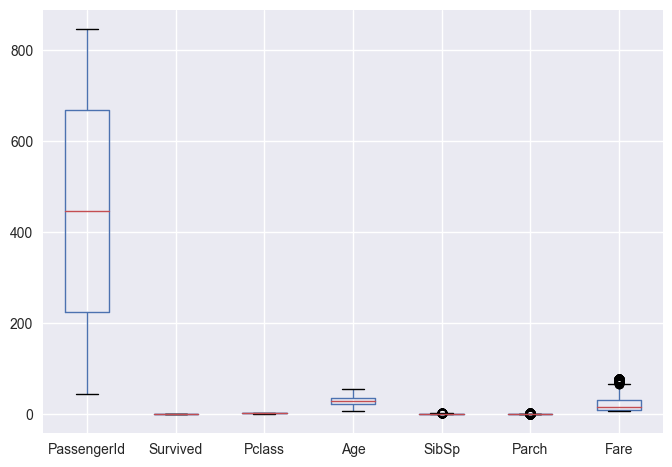

In [86]:
train.boxplot()

---

## 3. Variable Relations (변수 상관성)

### a. 상관계수 및 산점도를 통한 다중공선성 확인

In [63]:
# 1) 독립변수, 종속변수 설정
y = train[['Survived']]
x = train

# 2)상관행렬 보기
x.corr()


C:\Users\USER\AppData\Local\Temp\ipykernel_39104\3888384739.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  x.corr()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.033207,-0.057527,-0.001652,0.005592
Survived,-0.005007,1.000000,-0.338481,-0.069809,-0.035322,0.081629,0.316547
Pclass,-0.035144,-0.338481,1.000000,-0.331339,0.083081,0.018443,-0.718594
Age,0.033207,-0.069809,-0.331339,1.000000,-0.232625,-0.179191,0.141902
SibSp,-0.057527,-0.035322,0.083081,-0.232625,1.000000,0.414838,0.303349
Parch,-0.001652,0.081629,0.018443,-0.179191,0.414838,1.000000,0.271663
Fare,0.005592,0.316547,-0.718594,0.141902,0.303349,0.271663,1.000000


### b. VIF를 통한 다중공선성 확인

In [ ]:
# vif 확인


# VIF 출력을 위한 데이터 프레임 형성


# VIF 값과 각 Feature 이름에 대해 설정


# VIF 값이 높은 순으로 정렬


---

## 4. 변수 선택 및 모델 구축
## Feature Engineering & Initial Modeling  

### sklearn.linear_model.LogisticRegression()
- 로지스틱 회귀 모형
- 0과 1사이의 값을 산출

### sklearn.tree.DecisionTreeClassifier()
- 의사결정 나무 모델

## 5. 모델 학습 및 검증
## Model Tuning & Evaluation

### model.fit()
- 모델 학습

### model.predict()
- 모델 예측

### model.predict_proba()
- 모델 예측

### pd.DataFrame.to_csv()
 - csv파일 저장하는 함수

## 6. 결과 및 결언
## Conclusion & Discussion